# **Importing necessary Libraries**

In [ ]:
# lets import all the required libraries

# for mathematical operations
import numpy as np
# for dataframe operations
import pandas as pd
import os

# for data visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# for machine learning
import sklearn
import imblearn

# setting up the size of the figures
plt.rcParams['figure.figsize'] = (16, 5)
# setting up the style of the plot
plt.style.use('fivethirtyeight')

# **Loading Data**

In [ ]:
# reading the datasets

train_df = pd.read_csv('employee_promotion.csv')


In [ ]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 20)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 20]


In [ ]:
# lets check the shape of the train and test datasets
print("Shape of the Training Data :", train_df.shape)


Shape of the Training Data : (54808, 13)


In [ ]:
# Printing columns in Training Data
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [ ]:
train_df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49.0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60.0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50.0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50.0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73.0,0


# **Checking for Null Values**

In [ ]:
# Check whether any columns contain NaN or Null values
train_df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won                 0
avg_training_score      2560
is_promoted                0
dtype: int64

In [ ]:
#filling null values
train_df['education'] = train_df['education'].fillna(train_df['education'].mode()[0])
train_df['previous_year_rating'] = train_df['previous_year_rating'].fillna(train_df['previous_year_rating'].mode()[0])
train_df['avg_training_score'] = train_df['avg_training_score'].fillna(train_df['avg_training_score'].mode()[0])

# lets check whether the Null values are still present or not?
print("Number of Missing Values Left in the Training Data :", train_df.isnull().sum())

Number of Missing Values Left in the Training Data : employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won              0
avg_training_score      0
is_promoted             0
dtype: int64


In [ ]:
train_df.drop(columns=['employee_id'], inplace=True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   department            54808 non-null  object 
 1   region                54808 non-null  object 
 2   education             54808 non-null  object 
 3   gender                54808 non-null  object 
 4   recruitment_channel   54808 non-null  object 
 5   no_of_trainings       54808 non-null  int64  
 6   age                   54808 non-null  int64  
 7   previous_year_rating  54808 non-null  float64
 8   length_of_service     54808 non-null  int64  
 9   awards_won            54808 non-null  int64  
 10  avg_training_score    54808 non-null  float64
 11  is_promoted           54808 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 5.0+ MB


# **Data Visualization**

<function matplotlib.pyplot.tight_layout>

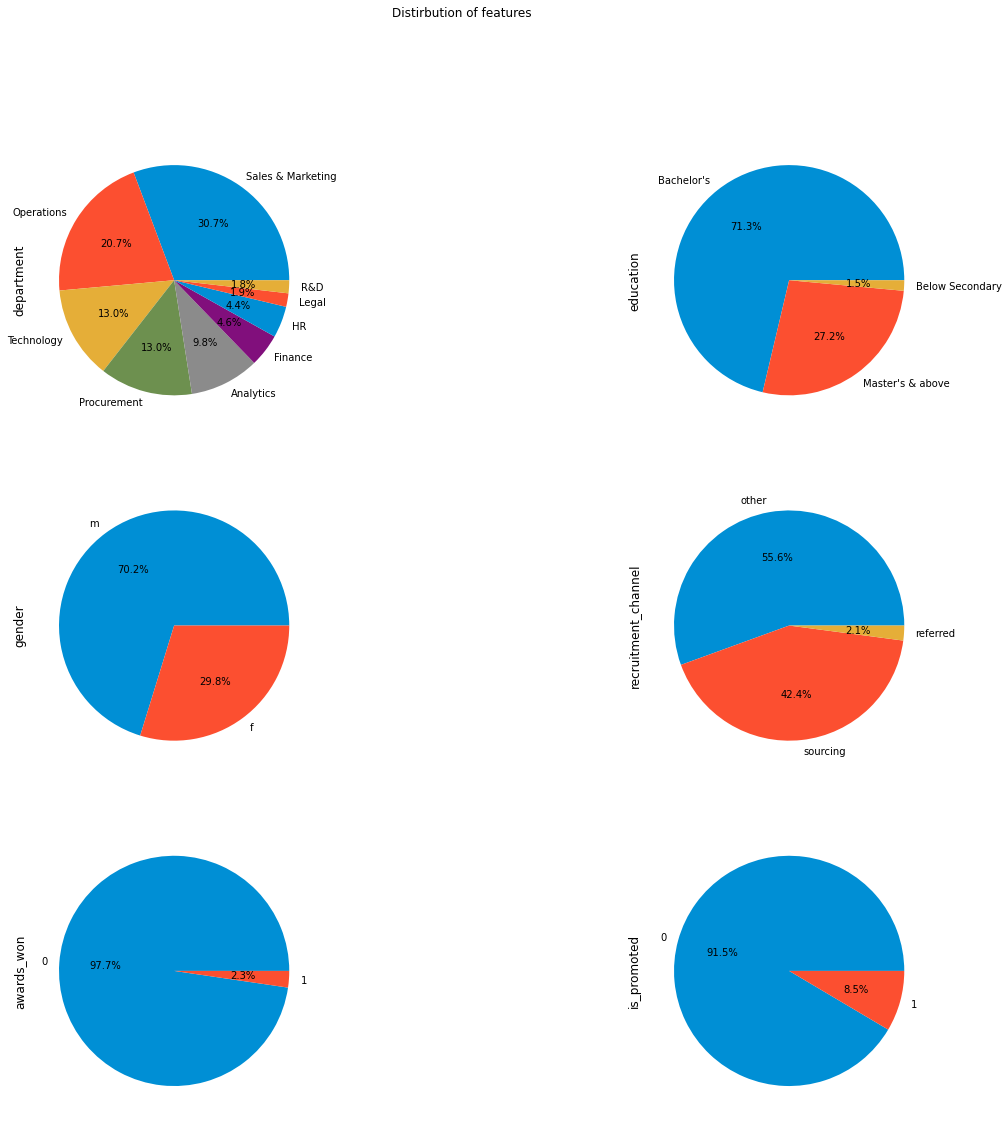

In [ ]:
# Check distributions of categorical features for training by pie charts
columns= ['department', 'education', 'gender', 'recruitment_channel', 'awards_won', 'is_promoted']

fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(18, 18))

for i, feature in enumerate(train_df[columns]):
    row = int(i/2)
    col = i%2
    pd.value_counts(train_df[columns].iloc[:, i]).plot.pie(autopct="%.1f%%", ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout


<function matplotlib.pyplot.tight_layout>

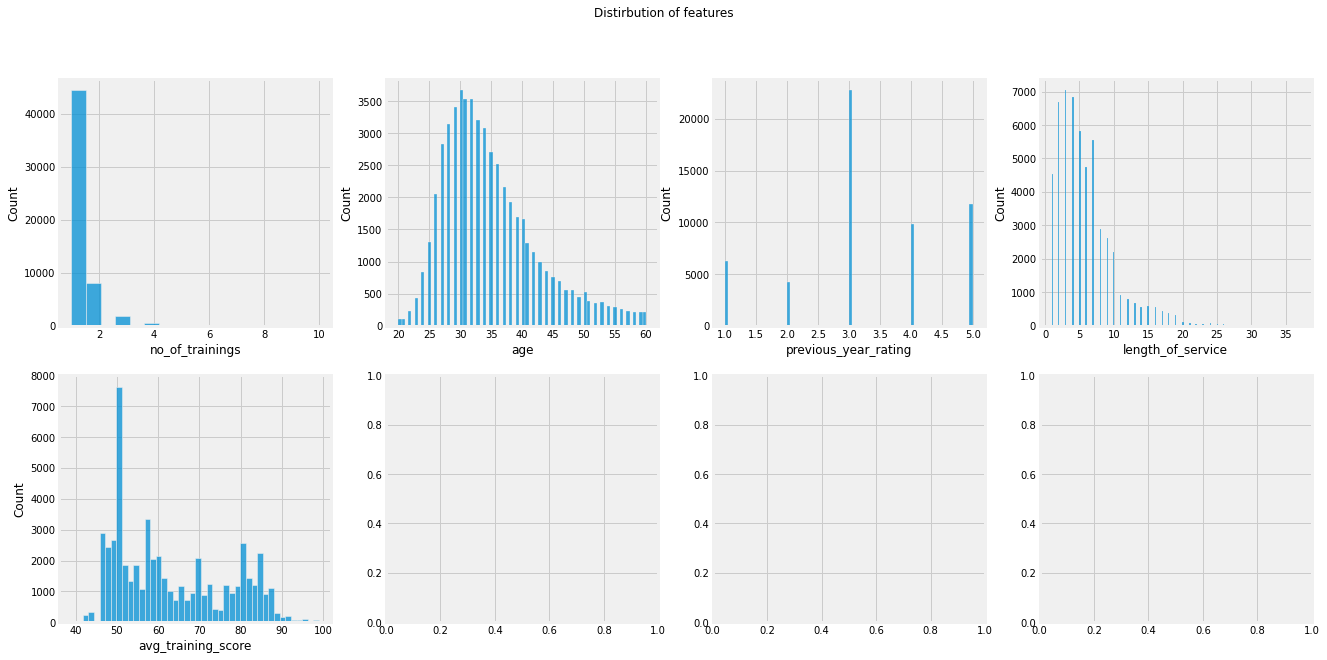

In [ ]:
columns = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'avg_training_score']
fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

for i, feature in enumerate(train_df[columns]):
    row = int(i/4)
    col = i%4
    sns.histplot(train_df[columns].iloc[:, i], ax=axs[row][col])

plt.suptitle('Distirbution of features')
plt.tight_layout

In [ ]:
train_df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

We can clearly see that, the data is not balanced. The promoted employees are only 4668 and not promoted employees are 50140. 91% and 9% ratio is very unbalanced

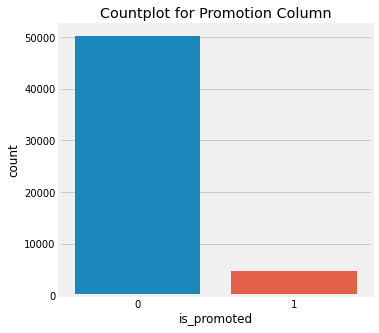

In [ ]:
#plotting target variable (Promotion)
plt.figure(figsize = (5, 5))
Attrplot=sns.countplot(x = 'is_promoted', data = train_df)
plt.title("Countplot for Promotion Column")
plt.show()

# **Bivariate Analysis**

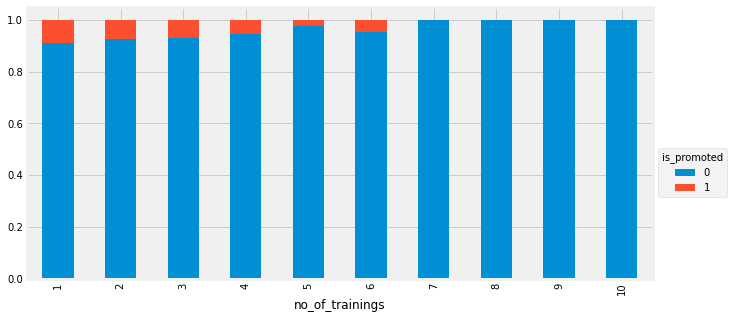

In [ ]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(train_df.no_of_trainings,train_df.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))

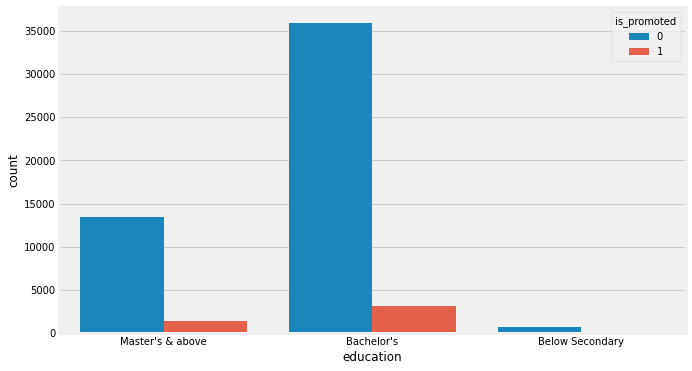

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='education', hue='is_promoted', data=train_df)

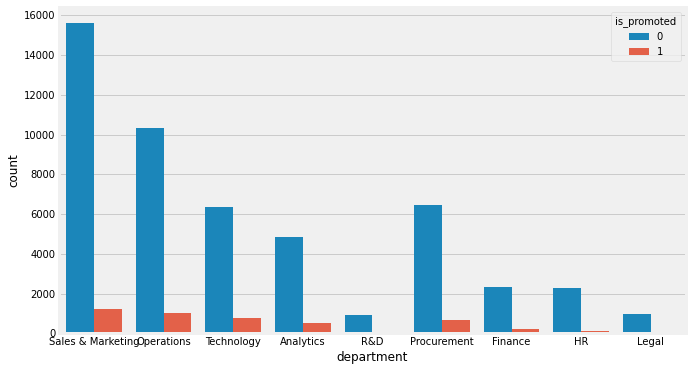

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='department', hue='is_promoted', data=train_df)

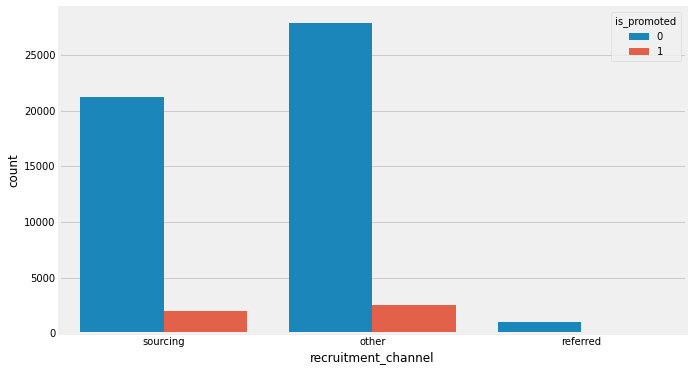

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='recruitment_channel', hue='is_promoted', data=train_df)

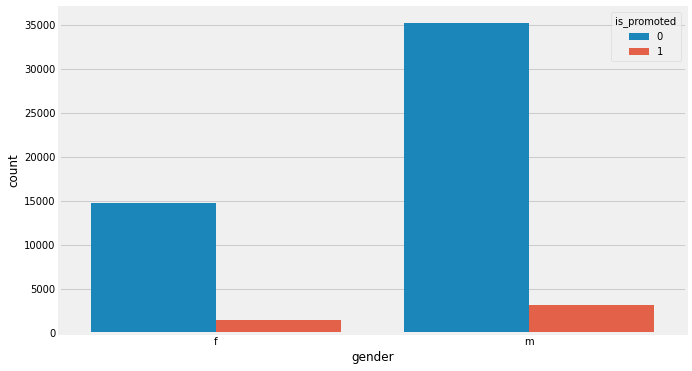

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='gender', hue='is_promoted', data=train_df)

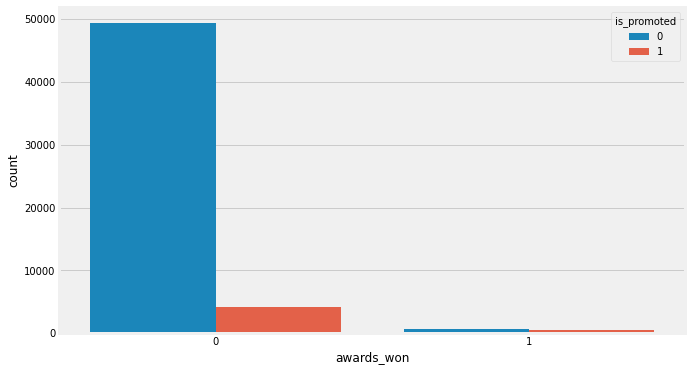

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='awards_won', hue='is_promoted', data=train_df)

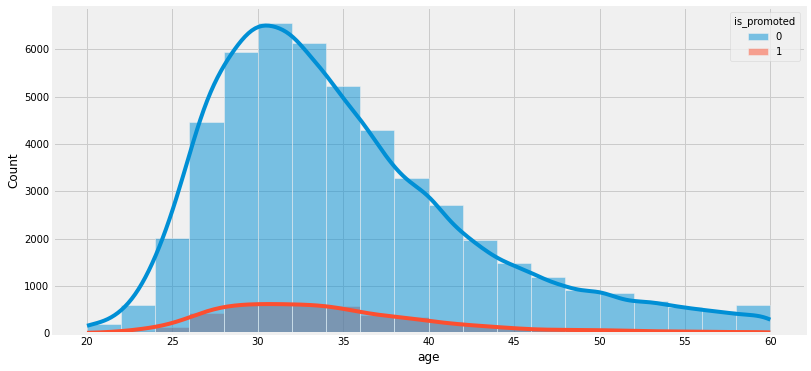

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(x='age', hue='is_promoted', data=train_df, bins=20, kde=True)

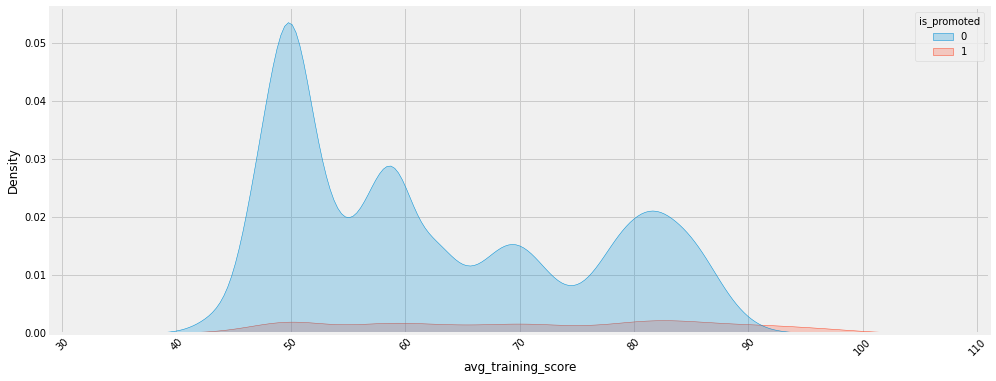

In [ ]:
plt.figure(figsize=(15,6))
sns.kdeplot(x='avg_training_score', hue='is_promoted', data=train_df, shade=True)
plt.xticks(rotation=45);

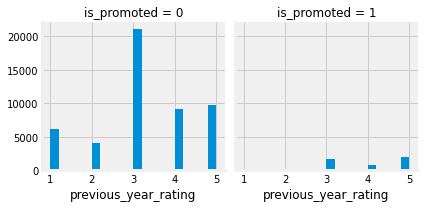

In [ ]:
g = sns.FacetGrid(train_df, col='is_promoted')
g.map(plt.hist, 'previous_year_rating', bins=20)

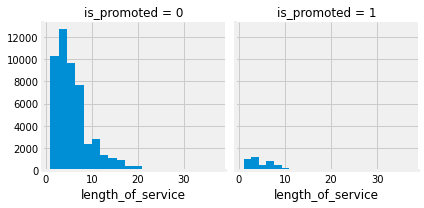

In [ ]:
g = sns.FacetGrid(train_df, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

# **One-Hot Encoding**

In [ ]:
from sklearn import preprocessing
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(train_df['department'])
train_df['department'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(train_df['region'])
train_df['region'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(train_df['education'].astype(str))
train_df['education'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(train_df['gender'])
train_df['gender'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(train_df['recruitment_channel'].astype(str))
train_df['recruitment_channel'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(train_df['recruitment_channel'])
train_df['recruitment_channel'] = encpro

# **Correlation among features**

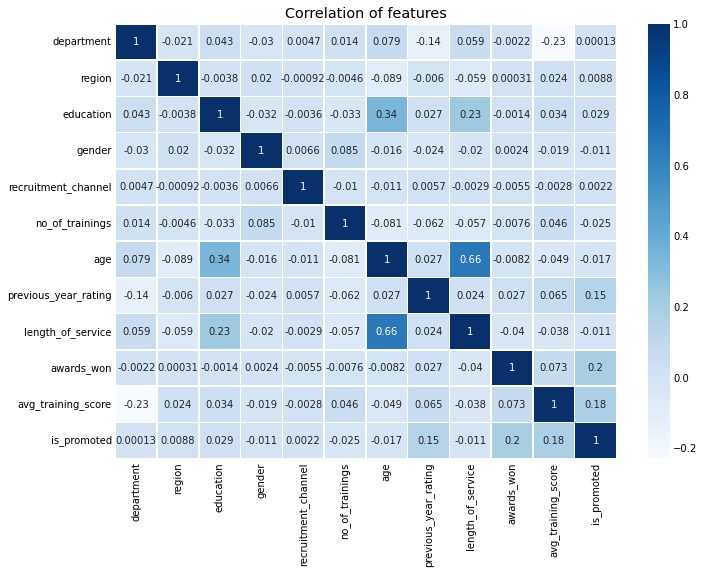

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Correlation of features')
sns.heatmap(train_df.corr(), annot=True, linewidths=.5, cmap="Blues")

# **Preaparing Train and Test Data**

In [ ]:
#dropping target column from input
X=train_df.drop(columns=['is_promoted'])
y=train_df['is_promoted']

**SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

smt = SMOTE()
X_up, y_up = smt.fit_resample(X, y)

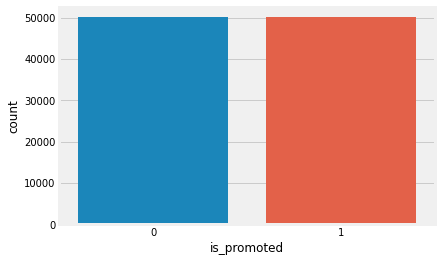

In [ ]:
sns.countplot(data=train_df, x = y_up)

In [ ]:
print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
print(y_up.value_counts())


Before Resampling :
0    50140
1     4668
Name: is_promoted, dtype: int64
After Resampling :
0    50140
1    50140
Name: is_promoted, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size=0.25, random_state=2)

print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", X_test.shape)
print("Shape of the y Test :", y_test.shape)


Shape of the x Train : (75210, 11)
Shape of the y Train : (75210,)
Shape of the x Test : (25070, 11)
Shape of the y Test : (25070,)


**Downsampling**

In [ ]:
train_df["is_promoted"].value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [ ]:
promoted=train_df[train_df["is_promoted"]==1] #getting the promoted employees
not_promoted=train_df[train_df["is_promoted"]==0] #getting not promoted employees
not_promoted=not_promoted.sample(4668) #getting only 4668 fromnot employees to down sample the data equal
downsample=pd.concat([promoted, not_promoted]) #now combining both

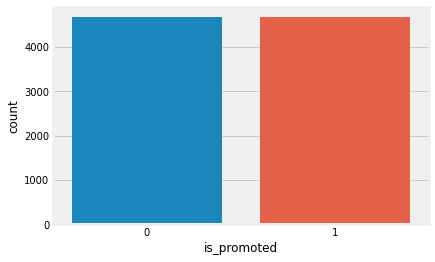

In [ ]:
sns.countplot(data= train_df, x = downsample['is_promoted'])

In [ ]:
X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(
    downsample.drop(columns=['is_promoted']), downsample['is_promoted'], test_size=0.25, random_state=2)

# **Building Model**

# **Logistic Regression**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
lr_mdl= LogisticRegression(solver='lbfgs',max_iter=10000)
lr_mdl1= lr_mdl.fit(X_train , y_train)
lr_mdl1

LogisticRegression(max_iter=10000)

**Results with SMOTE technique**

In [ ]:
y_pred_lr_mdl1 = lr_mdl1.predict(X_test) 

              precision    recall  f1-score   support

           0       0.70      0.69      0.69     12613
           1       0.69      0.70      0.69     12457

    accuracy                           0.69     25070
   macro avg       0.69      0.69      0.69     25070
weighted avg       0.69      0.69      0.69     25070



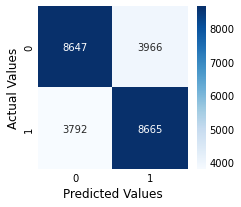

In [ ]:
cr_mdl1 = classification_report(y_test, y_pred_lr_mdl1)
print(cr_mdl1)

cm_mdl1 = confusion_matrix(y_test, y_pred_lr_mdl1)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl1, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Results with Downsampling technique**

In [ ]:
lr_mdl1_ds= lr_mdl.fit(X_train_ds , y_train_ds)
y_pred_lr_mdl1_ds = lr_mdl1_ds.predict(X_test_ds) 

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1142
           1       0.69      0.66      0.67      1192

    accuracy                           0.67      2334
   macro avg       0.67      0.67      0.67      2334
weighted avg       0.67      0.67      0.67      2334



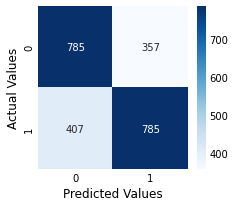

In [ ]:
cr_mdl1_ds = classification_report(y_test_ds, y_pred_lr_mdl1_ds)
print(cr_mdl1_ds)

cm_mdl1_ds = confusion_matrix(y_test_ds, y_pred_lr_mdl1_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl1_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Random Forest Classifier**

In [ ]:
rf_mdl= RandomForestClassifier(max_depth=10000)
rf_mdl2= rf_mdl.fit(X_train , y_train)

y_pred_rf_mdl2 = rf_mdl2.predict(X_test) 

**Results with SMOTE technique**

              precision    recall  f1-score   support

           0       0.94      0.96      0.95     12613
           1       0.96      0.94      0.95     12457

    accuracy                           0.95     25070
   macro avg       0.95      0.95      0.95     25070
weighted avg       0.95      0.95      0.95     25070



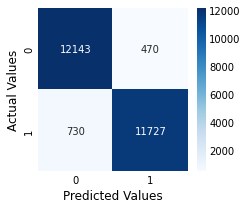

In [ ]:
cr_rf_mdl2 = classification_report(y_test, y_pred_rf_mdl2)
print(cr_rf_mdl2)

cm_mdl2 = confusion_matrix(y_test, y_pred_rf_mdl2)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl2, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Results with Downsampling technique**

              precision    recall  f1-score   support

           0       0.66      0.74      0.70      1142
           1       0.72      0.63      0.67      1192

    accuracy                           0.69      2334
   macro avg       0.69      0.69      0.69      2334
weighted avg       0.69      0.69      0.69      2334



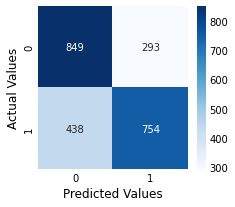

In [ ]:
rf_mdl2_ds= RandomForestClassifier(max_depth=10000).fit(X_train_ds , y_train_ds)

y_pred_rf_mdl2_ds = rf_mdl2_ds.predict(X_test_ds) 

cr_rf_mdl2_ds = classification_report(y_test_ds, y_pred_rf_mdl2_ds)
print(cr_rf_mdl2_ds)

cm_mdl2_ds = confusion_matrix(y_test_ds, y_pred_rf_mdl2_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl2_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Decision Tree Classifier**

In [ ]:
dt_mdl= DecisionTreeClassifier(class_weight='balanced',max_depth=10000)
dt_mdl3= dt_mdl.fit(X_train , y_train)

y_pred_dt_mdl3 = dt_mdl3.predict(X_test) 


**Results with SMOTE technique**

              precision    recall  f1-score   support

           0       0.93      0.90      0.92     12613
           1       0.90      0.93      0.92     12457

    accuracy                           0.92     25070
   macro avg       0.92      0.92      0.92     25070
weighted avg       0.92      0.92      0.92     25070



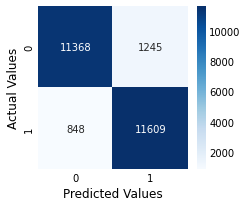

In [ ]:
cr_dt_mdl3 = classification_report(y_test, y_pred_dt_mdl3)
print(cr_dt_mdl3)

cm_mdl3 = confusion_matrix(y_test, y_pred_dt_mdl3)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl3, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Results with Downsampling technique**

In [ ]:
dt_mdl3_ds= dt_mdl.fit(X_train_ds , y_train_ds)

y_pred_dt_mdl3_ds = dt_mdl3_ds.predict(X_test_ds) 

              precision    recall  f1-score   support

           0       0.65      0.63      0.64      1142
           1       0.66      0.67      0.66      1192

    accuracy                           0.65      2334
   macro avg       0.65      0.65      0.65      2334
weighted avg       0.65      0.65      0.65      2334



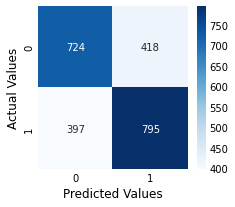

In [ ]:
cr_dt_mdl3_ds = classification_report(y_test_ds, y_pred_dt_mdl3_ds)
print(cr_dt_mdl3_ds)

cm_mdl3_ds = confusion_matrix(y_test_ds, y_pred_dt_mdl3_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl3_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **XGBoost Classifier**

**Results with SMOTE technique**

              precision    recall  f1-score   support

           0       0.82      0.92      0.87     12613
           1       0.91      0.80      0.85     12457

    accuracy                           0.86     25070
   macro avg       0.86      0.86      0.86     25070
weighted avg       0.86      0.86      0.86     25070



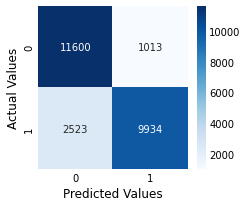

In [ ]:
xg_mdl= xgboost.XGBClassifier()
xg_mdl4= xg_mdl.fit(X_train , y_train)

y_pred_xg_mdl4 = xg_mdl4.predict(X_test) 

cr_xg_mdl4 = classification_report(y_test, y_pred_xg_mdl4)
print(cr_xg_mdl4)

cm_mdl4 = confusion_matrix(y_test, y_pred_xg_mdl4)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl4, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Results with Downsampling technique**

              precision    recall  f1-score   support

           0       0.68      0.83      0.75      1142
           1       0.80      0.62      0.70      1192

    accuracy                           0.73      2334
   macro avg       0.74      0.73      0.72      2334
weighted avg       0.74      0.73      0.72      2334



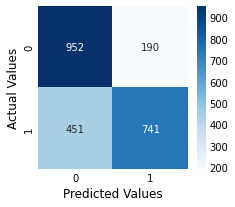

In [ ]:
xg_mdl4_ds= xg_mdl.fit(X_train_ds , y_train_ds)
y_pred_xg_mdl4_ds = xg_mdl4_ds.predict(X_test_ds) 

cr_xg_mdl4_ds = classification_report(y_test_ds, y_pred_xg_mdl4_ds)
print(cr_xg_mdl4_ds)

cm_mdl4_ds = confusion_matrix(y_test_ds, y_pred_xg_mdl4_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl4_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Naive Bayes Classifier**

**Results with SMOTE technique**

              precision    recall  f1-score   support

           0       0.71      0.62      0.66     12613
           1       0.66      0.75      0.70     12457

    accuracy                           0.68     25070
   macro avg       0.69      0.68      0.68     25070
weighted avg       0.69      0.68      0.68     25070



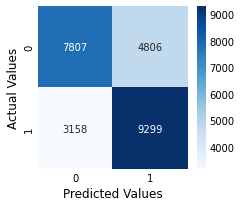

In [ ]:
nb_mdl= GaussianNB()
nb_mdl5= nb_mdl.fit(X_train , y_train)

y_pred_nb_mdl5 = nb_mdl5.predict(X_test) 

cr_nb_mdl5 = classification_report(y_test, y_pred_nb_mdl5)
print(cr_nb_mdl5)

cm_mdl5 = confusion_matrix(y_test, y_pred_nb_mdl5)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl5, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Results with Downsampling technique**

              precision    recall  f1-score   support

           0       0.58      0.92      0.71      1142
           1       0.82      0.35      0.50      1192

    accuracy                           0.63      2334
   macro avg       0.70      0.64      0.60      2334
weighted avg       0.70      0.63      0.60      2334



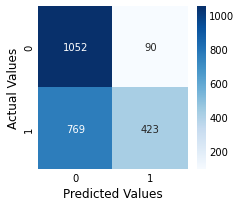

In [ ]:
nb_mdl5_ds= nb_mdl.fit(X_train_ds , y_train_ds)

y_pred_nb_mdl5_ds = nb_mdl5_ds.predict(X_test_ds) 

cr_nb_mdl5_ds = classification_report(y_test_ds, y_pred_nb_mdl5_ds)
print(cr_nb_mdl5_ds)

cm_mdl5_ds = confusion_matrix(y_test_ds, y_pred_nb_mdl5_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl5_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# **Support Vector Machines**

In [ ]:
from sklearn import svm

**Results with SMOTE technique**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.56      0.94      0.70     12613
           1       0.81      0.26      0.39     12457

    accuracy                           0.60     25070
   macro avg       0.69      0.60      0.55     25070
weighted avg       0.69      0.60      0.55     25070



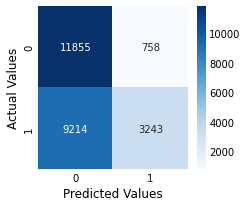

In [ ]:
svm_mdl=svm.LinearSVC()
svm_mdl6=svm_mdl.fit(X_train, y_train)

y_pred_svm_mdl6 = svm_mdl6.predict(X_test) 

cr_svm_mdl6 = classification_report(y_test, y_pred_svm_mdl6)
print(cr_svm_mdl6)

cm_mdl6 = confusion_matrix(y_test, y_pred_svm_mdl6)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl6, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

**Results with Downsampling technique**

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


              precision    recall  f1-score   support

           0       0.92      0.12      0.21      1142
           1       0.54      0.99      0.70      1192

    accuracy                           0.56      2334
   macro avg       0.73      0.55      0.45      2334
weighted avg       0.72      0.56      0.46      2334



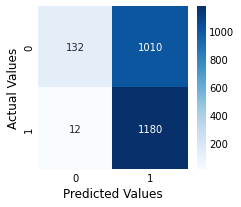

In [ ]:
svm_mdl6_ds=svm_mdl.fit(X_train_ds, y_train_ds)


y_pred_svm_mdl6_ds = svm_mdl6_ds.predict(X_test_ds) 

cr_svm_mdl6_ds = classification_report(y_test_ds, y_pred_svm_mdl6_ds)
print(cr_svm_mdl6_ds)

cm_mdl6_ds = confusion_matrix(y_test_ds, y_pred_svm_mdl6_ds)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm_mdl6_ds, annot = True, cmap = 'Blues', fmt = '.8g')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()